(1)

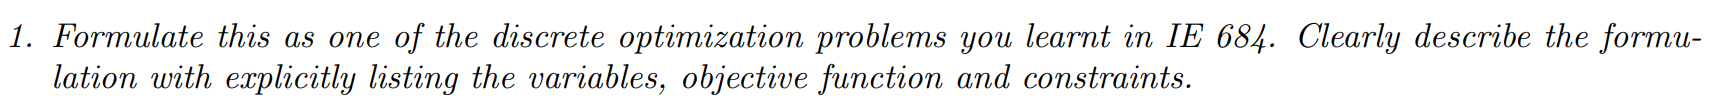

This optimization problem aims to minimize the total cost of production while ensuring that the demand for each product is met, utilizing binary variables $y_i$ to activate the respective $x_i$ variables when needed.

$\textbf{Objective Function:}$
\begin{equation*}
\text{Minimize} (15x_1 + 25x_2 + 35x_3 + 50x_4 + 60x_5 + 75x_6) + 1500\sum_{i=1}^{6} y_i
\end{equation*}

$\textbf{Subject to:}$
\begin{align*}
x_1 + x_2 + x_3 + x_4 + x_5 + x_6 &\geq 300 + 450 + 80 + 500 + 150 + 800 \\
x_2 + x_3 + x_4 + x_5 + x_6 &\geq 450 + 80 + 500 + 150 + 800 \\
x_3 + x_4 + x_5 + x_6 &\geq 80 + 500 + 150 + 800 \\
x_4 + x_5 + x_6 &\geq 500 + 150 + 800 \\
x_5 + x_6 &\geq 150 + 800 \\
x_6 &\geq 800 \\
x_1 &\leq 300y_1 \\
x_2 &\leq 750y_2 \\
x_3 &\leq 830y_3 \\
x_4 &\leq 1330y_4 \\
x_5 &\leq 1480y_5 \\
x_6 &\leq 2280y_6 \\
x_i &\geq 0 \quad \text{for } i=1,2,3,4,5,6 \\
y_i &\in {0,1} \quad \text{for } i=1,2,3,4,5,6 \\
\end{align*}

$\text{$y_i$ takes value 0 when $x_i$ becomes 0, $y_i$ takes value 1 when $x_i$ is non-zero.}$

$\text{Objective function aims to minimize the cost while constraints make sure that demand is satisfied.}$



In [3]:
!pip install -q pyomo
!apt-get install -y -qq glpk-utils

from pyomo.environ import *

model = ConcreteModel()

# Decision variables
model.x = Var([1,2,3,4,5,6], domain=NonNegativeIntegers)
model.y = Var([1,2,3,4,5,6], domain=Binary)

# Objective function coefficients
V = [15,25,35,50,60,75]

# Objective function
model.obj = Objective(expr=sum(V[i] * model.x[i+1] for i in range(len(V))) + 1500*sum(model.y[j+1] for j in range(6)), sense=minimize)

# Constraints
model.constraints = ConstraintList()
demands = [300+450+80+500+150+800, 450+80+500+150+800, 80+500+150+800, 500+150+800, 150+800, 800]
for i in range(6):
    model.constraints.add(expr=sum(model.x[j] for j in range(i+1,7)) >= demands[i])
    model.constraints.add(expr=model.x[i+1] <= [300,750,830,1330,1480,2280][i]*model.y[i+1])

# Solve the problem using GLPK solver
solver = SolverFactory('glpk', executable='/usr/bin/glpsol')
results = solver.solve(model)

# Print results
print(results)
print("Optimal Solution:")
model.x.display()


# Display solution
print('Minimum objective value of problem (Cost) =', value(model.obj), 'Rupees\n')

print('Decision Variables:')
for i in range(6):
    print(f'X{i+1} =', model.x[i+1].value)
for i in range(6):
    print(f'y{i+1} =', model.y[i+1].value)

print('\nConstraint values:')
for i in range(12):
    print(f'constraint {i+1} =', value(model.constraints[i+1]))



Problem: 
- Name: unknown
  Lower bound: 121250.0
  Upper bound: 121250.0
  Number of objectives: 1
  Number of constraints: 12
  Number of variables: 12
  Number of nonzeros: 33
  Sense: minimize
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 9
      Number of created subproblems: 9
  Error rc: 0
  Time: 0.004222869873046875
Solution: 
- number of solutions: 0
  number of solutions displayed: 0

Optimal Solution:
x : Size=6, Index={1, 2, 3, 4, 5, 6}
    Key : Lower : Value : Upper : Fixed : Stale : Domain
      1 :     0 : 300.0 :  None : False : False : NonNegativeIntegers
      2 :     0 : 450.0 :  None : False : False : NonNegativeIntegers
      3 :     0 :   0.0 :  None : False : False : NonNegativeIntegers
      4 :     0 : 580.0 :  None : False : False : NonNegativeIntegers
      5 :     0 : 150.0 :  None : False : False : NonNegativeIntegers
      6 :     0 : 800.0 :  None : False : False : NonN

$\textbf{Boxes of each type which are required:}$

$\text{Box 1 = 300}$

$\text{Box 2 = 450}$

$\text{Box 3 = 0 }$

$\text{Box 4 = 580}$

$\text{Box 5 = 150}$

$\text{Box 6 = 800}$

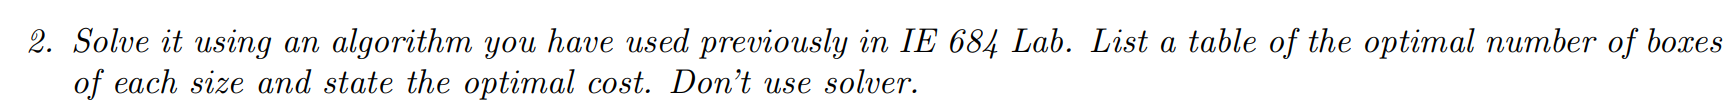

In [5]:
import sys

def dijkstra(graph, source):
    vertices = len(graph)
    dist = [sys.maxsize] * vertices
    dist[source] = 0
    visited = [False] * vertices

    for _ in range(vertices):
        min_dist_index = min((i for i in range(vertices) if not visited[i]), key=lambda x: dist[x])
        visited[min_dist_index] = True
        for v in range(vertices):
            if graph[min_dist_index][v] > 0 and not visited[v]:
                dist[v] = min(dist[v], dist[min_dist_index] + graph[min_dist_index][v])

    return dist

cost= [[0, 300*15+1500, (300+450)*25+1500, (300+450+80)*35+1500, (300+450+80+500)*50+1500, (300+450+80+500+150)*60+1500, (300+450+80+500+150+800)*75+1500],
    [sys.maxsize, 0, 450*25+1500, (450+80)*35+1500, (450+80+500)*50+1500, (450+80+500+150)*60+1500,(450+80+500+150+800)*75+1500],
    [sys.maxsize, sys.maxsize, 0,  80*35+1500, (80+500)*50+1500, (80+500+150)*60+1500, (80+500+150+800)*75+1500],
    [sys.maxsize, sys.maxsize, sys.maxsize, 0, 500*50+1500, (500+150)*60+1500, (500+150+800)*75+1500],
    [sys.maxsize, sys.maxsize, sys.maxsize,  sys.maxsize, 0,  150*60+1500, (150+800)*75+1500],
    [sys.maxsize, sys.maxsize,  sys.maxsize,  sys.maxsize,  sys.maxsize, 0,  800*75+1500],
    [sys.maxsize, sys.maxsize, sys.maxsize, sys.maxsize, sys.maxsize,   sys.maxsize,  0]]

source = 0
shortest_distances = dijkstra(cost, source)
print('Optimal cost:', [x for x in shortest_distances][-1])
print(shortest_distances)
differences = [shortest_distances[i+1] - shortest_distances[i] for i in range(len(shortest_distances)-1)]
print(differences)

Optimal cost: 121250
[0, 6000, 18750, 23050, 49250, 59750, 121250]
[6000, 12750, 4300, 26200, 10500, 61500]


$\textbf{So:}$

$\text{Box 1 = 300}$

$\text{Box 2 = 450}$  

$\text{Box 3 = 0  
(The differences array contains 26200 which does not match with the elemet of matrix that means there is another short way to go forward except 3)}$

$\text{Box 4 = 580}$

$\text{Box 5 = 150}$

$\text{Box 6 = 800}$

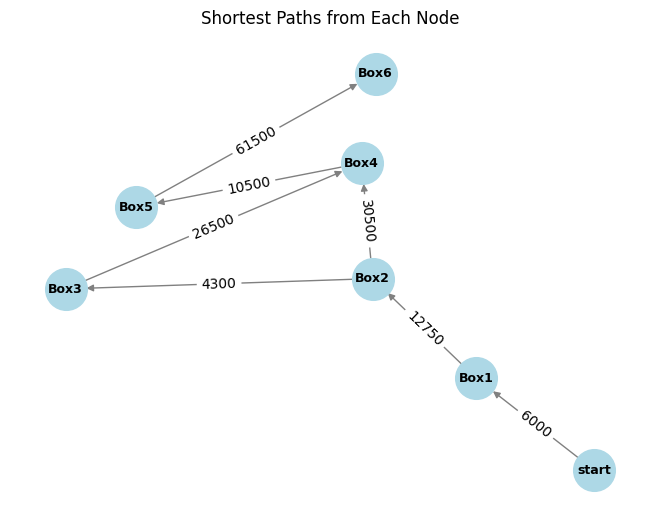

In [14]:
import networkx as nx
import matplotlib.pyplot as plt

# Define graph nodes and edges
nodes = ['start', 'Box1', 'Box2', 'Box3', 'Box4', 'Box5', 'Box6']

edges = [('start', 'Box1', 300*15+1500), ('start', 'Box2', (300+450)*25+1500), ('start', 'Box3', (300+450+80)*35+1500),
    ('start', 'Box4', (300+450+80+500)*50+1500), ('start', 'Box5', (300+450+80+500+150)*60+1500), ('start', 'Box6', (300+450+80+500+150+800)*75+1500),
    ('Box1', 'Box2', 450*25+1500), ('Box1', 'Box3', (450+80)*35+1500), ('Box1', 'Box4', (450+80+500)*50+1500),
    ('Box1', 'Box5', (450+80+500+150)*60+1500), ('Box1', 'Box6', (450+80+500+150+800)*75+1500),
    ('Box2', 'Box3', 80*35+1500), ('Box2', 'Box4', (80+500)*50+1500), ('Box2', 'Box5', (80+500+150)*60+1500),
    ('Box2', 'Box6', (80+500+150+800)*75+1500),
    ('Box3', 'Box4', 500*50+1500), ('Box3', 'Box5', (500+150)*60+1500), ('Box3', 'Box6', (500+150+800)*75+1500),
    ('Box4', 'Box5', 150*60+1500), ('Box4', 'Box6', (150+800)*75+1500),
    ('Box5', 'Box6', 800*75+1500)]

# Create directed graph
G = nx.DiGraph()

# Add nodes and edges to the graph
G.add_nodes_from(nodes)
G.add_weighted_edges_from(edges)

# Find shortest paths from each node using Dijkstra's algorithm
shortest_paths = {}
for node in nodes:
    shortest_paths[node] = nx.single_source_dijkstra_path(G, node)

# Create a new graph to plot shortest paths only
G_shortest_paths = nx.DiGraph()

# Add shortest paths to the new graph
for node in shortest_paths:
    for destination in shortest_paths[node]:
        path = shortest_paths[node][destination]
        path_edges = [(path[i], path[i+1]) for i in range(len(path)-1)]
        G_shortest_paths.add_edges_from(path_edges)

# Create graph layout
pos = nx.spring_layout(G_shortest_paths)

# Draw graph
nx.draw(G_shortest_paths, pos, with_labels=True, node_size=900, node_color='lightblue', font_size=9, font_weight='bold', edge_color='gray', arrows=True)

# Add edge labels
edge_labels = {(edge[0], edge[1]): G[edge[0]][edge[1]]['weight'] for edge in G_shortest_paths.edges()}
nx.draw_networkx_edge_labels(G_shortest_paths, pos, edge_labels=edge_labels)

# Show plot
plt.title('Shortest Paths from Each Node')
plt.show()

$\textbf{As we can observe from the plot that Box3 is not included in the shortest route calculation, as Box2 and Box4 are considered instead.}$

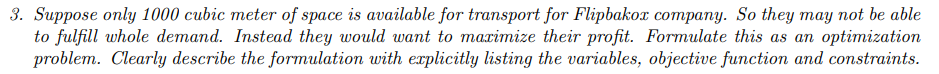

**Objective Function:**

Maximize $\sum_{i=1}^{6} [(p_i - c_i) \cdot x_i - f_i \cdot y_i]$

**Subject to:**

$\sum_{i=1}^{6} [(p_i - c_i) \cdot x_i] \leq$ Total production cost limit \\
$x_i \leq$ Capacity limit for item $i$ \\
$x_i \geq 0$ for $i=1,2,3,4,5,6$ \\
$y_i \in \{0,1\}$ for $i=1,2,3,4,5,6$

**Explanation:**
The objective is to maximize profit by determining the production quantities ($x_i$) and production decisions ($y_i$) for each item. The objective function maximizes the difference between the selling price ($p_i$) and production cost ($c_i$) of each item, while subtracting the fixed cost ($f_i$) associated with producing each item. Constraints ensure that the total production cost does not exceed a limit and that the production quantities do not exceed capacity. Binary variables ($y_i$) are used to enforce production decisions based on whether production quantity ($x_i$) is non-zero or not.


$\textbf{Objective Function:}$
\begin{equation*}
\text{Maximize} (300 - 15) x_1+(300 - 25) x_2+(350 - 35) x_3+(500 - 50) x_4+(600 - 60) x_5+(800 - 75) x_6 - 1500\sum_{i=1}^{6} y_i
\end{equation*}

$\textbf{Subject to:}$
\begin{align*}
0.15x_1 + 0.25x_2 + 0.35x_3 + 0.5x_4 + 0.6x_5 + 0.75x_6 &\leq 1000 \\
x_1 &\leq 300 \\
x_1 + x_2 &\leq 300 + 450 \\
x_1 + x_2 + x_3 &\leq 300 + 450 + 80 \\
x_1 + x_2 + x_3 + x_4 &\leq 300 + 450 + 80 + 500 \\
x_1 + x_2 + x_3 + x_4 + x_5 &\leq 300 + 450 + 80 + 500 + 150 \\
x_1 + x_2 + x_3 + x_4 + x_5 + x_6 &\leq 300 + 450 + 80 + 500 + 150 + 800 \\
x_1 &\leq 300y_1 \\
x_2 &\leq 750y_2 \\
x_3 &\leq 830y_3 \\
x_4 &\leq 1330y_4 \\
x_5 &\leq 1480y_5 \\
x_6 &\leq 2280y_6 \\
x_i &\geq 0 \quad \text{for } i=1,2,3,4,5,6 \\
y_i &\in \{0,1\} \quad \text{for } i=1,2,3,4,5,6 \\
\end{align*}

$\text{$y_i$ takes value 0 when $x_i$ becomes 0, $y_i$ takes value 1 when $x_i$ is non zero.}$

$\text{Objective function aims to maximize the profit.}$

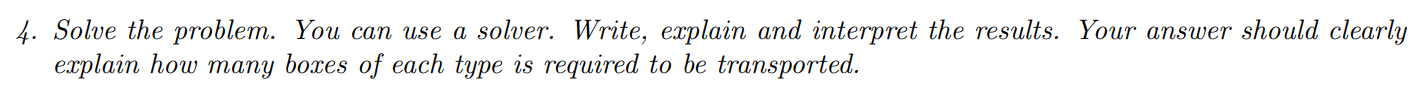

In [23]:
from pyomo.environ import *
import numpy as np

# Create a concrete model
model = ConcreteModel()

# Define decision variables
model.a = Var([1,2,3,4,5,6], domain=NonNegativeIntegers)  # Decision variable 'a'
model.b = Var([1,2,3,4,5,6], domain=Binary)              # Decision variable 'b'

# Set of objective function coefficients
P=[300,300,350,500,600,800]   # Coefficients for objective function
V = [15,25,35,50,60,75]       # Coefficients for objective function

# Define the objective function
model.obj = Objective(expr=sum((P[i]-V[i]) * model.a[i+1] for i in range(len(V))) - 1500*sum(model.b[j+1] for j in range(6)), sense=maximize)

# Constraints
model.constraints = ConstraintList()
model.constraints.add(expr=0.15*model.a[1]+0.25*model.a[2]+0.35*model.a[3]+0.5*model.a[4]+0.6*model.a[5]+0.75*model.a[6]<=1000)  # Constraint 1
model.constraints.add(expr=model.a[1]<=300)         # Constraint 2
model.constraints.add(expr=model.a[1]+model.a[2]<=300+450)  # Constraint 3
model.constraints.add(expr=model.a[1]+model.a[2]+model.a[3]<=300+450+80)  # Constraint 4
model.constraints.add(expr=model.a[1]+model.a[2]+model.a[3]+model.a[4]<=300+450+80+500)  # Constraint 5
model.constraints.add(expr=model.a[1]+model.a[2]+model.a[3]+model.a[4]+model.a[5]<=300+450+80+500+150)  # Constraint 6
model.constraints.add(expr=model.a[1]+model.a[2]+model.a[3]+model.a[4]+model.a[5]+model.a[6]<=300+450+80+500+150+800)  # Constraint 7
model.constraints.add(expr=model.a[1]<=300*model.b[1])  # Constraint 8
model.constraints.add(expr=model.a[2]<=750*model.b[2])  # Constraint 9
model.constraints.add(expr=model.a[3]<=830*model.b[3])  # Constraint 10
model.constraints.add(expr=model.a[4]<=1330*model.b[4]) # Constraint 11
model.constraints.add(expr=model.a[5]<=1480*model.b[5]) # Constraint 12
model.constraints.add(expr=model.a[6]<=2280*model.b[6]) # Constraint 13

# Solve the problem using GLPK solver
solver = SolverFactory('glpk', executable='/usr/bin/glpsol')
results = solver.solve(model)

# Print results
print(results)
print("Optimal Solution:")
model.a.display()



Problem: 
- Name: unknown
  Lower bound: 1019100.0
  Upper bound: 1019100.0
  Number of objectives: 1
  Number of constraints: 13
  Number of variables: 12
  Number of nonzeros: 39
  Sense: maximize
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 3
      Number of created subproblems: 3
  Error rc: 0
  Time: 0.0040132999420166016
Solution: 
- number of solutions: 0
  number of solutions displayed: 0

Optimal Solution:
a : Size=6, Index={1, 2, 3, 4, 5, 6}
    Key : Lower : Value  : Upper : Fixed : Stale : Domain
      1 :     0 :  300.0 :  None : False : False : NonNegativeIntegers
      2 :     0 :  448.0 :  None : False : False : NonNegativeIntegers
      3 :     0 :    0.0 :  None : False : False : NonNegativeIntegers
      4 :     0 :    0.0 :  None : False : False : NonNegativeIntegers
      5 :     0 :    0.0 :  None : False : False : NonNegativeIntegers
      6 :     0 : 1124.0 :  None : False : Fa

In [24]:
# Display solution
print('Maximum objective value of problem (Profit) =', value(model.obj), 'Rupees')
print('\nDecision Variables:')
for i in range(6):
    print(f'X{i+1} =', model.a[i+1].value)
    print(f'y{i+1} =', model.b[i+1].value)

print('\nConstraint values:')
for i in range(13):
    print('constraint', i+1, '=', value(model.constraints[i+1]))


Maximum objective value of problem (Profit) = 1019100.0 Rupees

Decision Variables:
X1 = 300.0
y1 = 1.0
X2 = 448.0
y2 = 1.0
X3 = 0.0
y3 = 0.0
X4 = 0.0
y4 = 0.0
X5 = 0.0
y5 = 0.0
X6 = 1124.0
y6 = 1.0

Constraint values:
constraint 1 = 1000.0
constraint 2 = 300.0
constraint 3 = 748.0
constraint 4 = 748.0
constraint 5 = 748.0
constraint 6 = 748.0
constraint 7 = 1872.0
constraint 8 = 0.0
constraint 9 = -302.0
constraint 10 = 0.0
constraint 11 = 0.0
constraint 12 = 0.0
constraint 13 = -1156.0


$\textbf{Boxes of each type which are required:}$

$\text{Box 1 = 300}$

$\text{Box 2 = 448}$

$\text{Box 3 = 0 }$

$\text{Box 4 = 0}$

$\text{Box 5 = 0}$

$\text{Box 6 = 1124}$

$\textbf{Some of the boxes of type 6 will be used to satisfy the demand of boxes of type 3,4,5.}$